# Transition Matrix


We define the 'transition matrix' $T$ as the matrix that stores the prior log-probabilities $\log p(\nu_j \mid \nu_{j-1})$. These transition probabilities depend only on the size and direction of the transition, and in our case correspond to a jump in frequency when moving from the $(j-1)$th to the $j$th state. It is within the transition matrix that we impose some loose model constraints. For example it is usual in the time-frequency plane for frequencies to only have discrete values (frequency bins) and a track might only be allowed to move by one bin in each time step, restricting it to a \ac{UCD} transition or 'jump' or equivalently setting the size of the first dimension of the transition matrix $n_1 = 3$. We can also impose that the transition probabilities are independent of the current track location in frequency, i.e., $p(\nu_j \mid \nu_{j-1})=p(\nu_{j+k} \mid \nu_{j+k-1})$. This leads to the transition matrix containing only three numbers, corresponding to the three prior log-probabilities that the track was in the corresponding \ac{UCD} frequency bin at the previous time step. These numbers are chosen to reflect the prior probability of a frequency deviation in the track and depend on the class of signals that one wishes to detect.



In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import soap

As an example we could set the log-prior probabilies of making a jump as follows:

In [61]:
p_up = 0.
p_center = 1
p_down = 0.
transition_matrix = np.log([p_up,p_center,p_down])
print(transition_matrix)

[-inf   0. -inf]


/Users/joebayley/.virtualenvs/soap/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


Where the sum of p_up,p_center and p_down must be 1. This then forces the track to stay in the same frequency bin.

To test this, we can generate a simple random spectrogram, which has a signal injected in a single frequency bin.

In [62]:
data = np.abs(np.random.normal(scale = 4,size = (20,30)))
data[:,11] += 8

In [67]:
track = soap.single_detector(transition_matrix,data)

As the injected signal stayed in the same frequency bin for the entire duration, this transition matrix correctly identified the track.

Text(0.5, 42.0, 'Time')

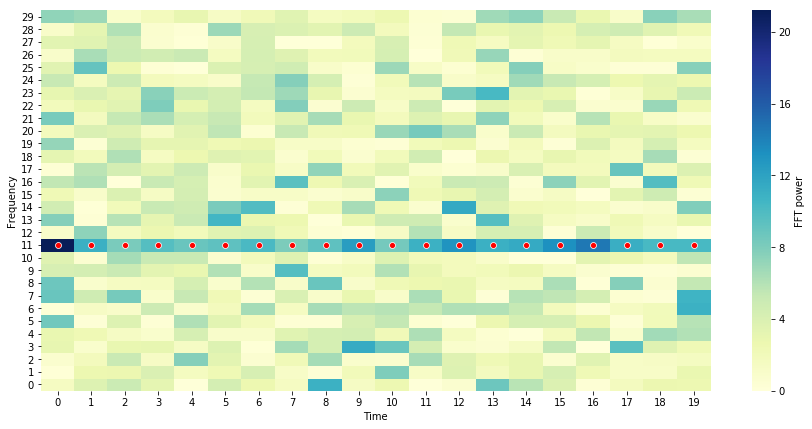

In [63]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(data.T,ax=ax,cbar=True,cmap="YlGnBu",cbar_kws={'label': 'FFT power'})
# 0.5 added so at center of bin not at edge
sns.scatterplot(np.arange(len(track.opt_path)) + 0.5,track.opt_path+0.5,color="red")
ax.invert_yaxis()
ax.set_ylabel("Frequency")
ax.set_xlabel("Time")

However, if we then force the track to only jump down in frequency, it will not find the injected track, but only find tracks which decrease in frequency.

In [64]:
p_up_d = 0.
p_center_d = 0.
p_down_d = 1.
transition_matrix_down = np.log([p_up_d,p_center_d,p_down_d])
print(transition_matrix_down)

[-inf -inf   0.]


/Users/joebayley/.virtualenvs/soap/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [65]:
track_down = soap.single_detector(transition_matrix_down,data)

Text(0.5, 42.0, 'Time')

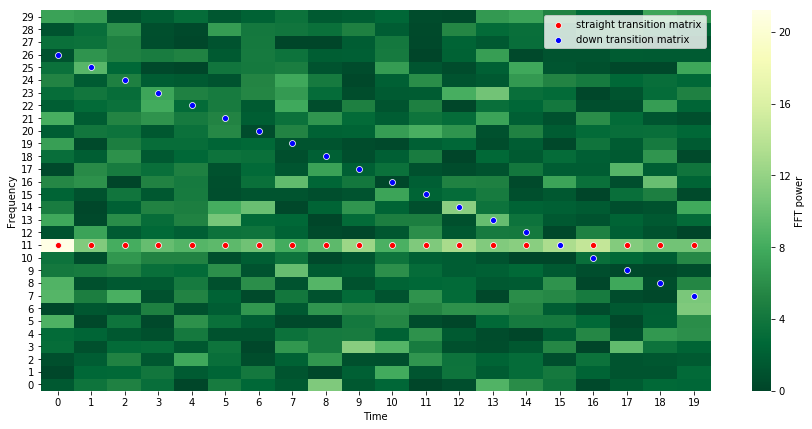

In [80]:
fig, ax = plt.subplots(figsize = (15,7))
im = sns.heatmap(data.T,ax=ax,cbar=True,cmap="YlGn_r",cbar_kws={'label': 'FFT power'})
# 0.5 added so at center of bin not at edge
sns.scatterplot(np.arange(len(track.opt_path)) + 0.5,track.opt_path+0.5,color="red",label="straight transition matrix")
sns.scatterplot(np.arange(len(track_down.opt_path)) + 0.5,track_down.opt_path+0.5,color="blue",label = "down transition matrix")
ax.invert_yaxis()
ax.set_ylabel("Frequency")
ax.set_xlabel("Time")

The probailities of the jump can then be tuned for the search, depending on what type of signal is being searched for.

The transition matrix can also be modifies to allow jumps which are larger than 1 bin, i.e.,

In [70]:
p_up2 = 0.
p_up = 0.
p_center = 0.
p_down = 0.5
p_down2 = 0.5
transition_matrix_down2 = np.log([p_up2,p_up,p_center,p_down,p_down2])
print(transition_matrix_down2)

[       -inf        -inf        -inf -0.69314718 -0.69314718]


/Users/joebayley/.virtualenvs/soap/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [72]:
track_down2 = soap.single_detector(transition_matrix_down2,data)

This track is is also forced to go down by one or two bins per time step.

Text(0.5, 42.0, 'Time')

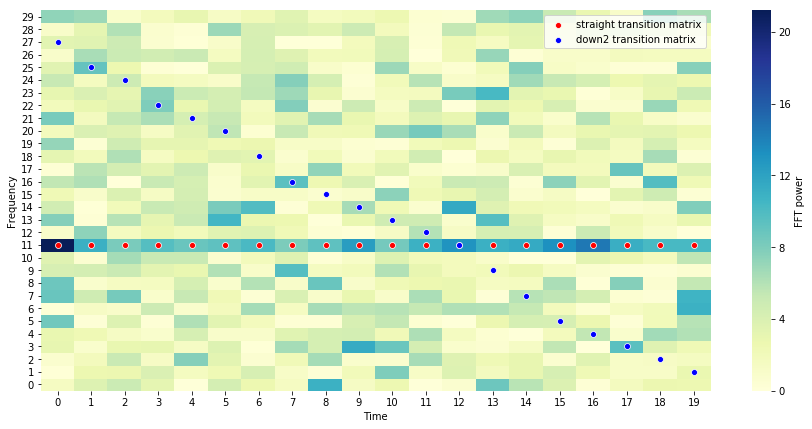

In [73]:
fig, ax = plt.subplots(figsize = (15,7))
sns.heatmap(data.T,ax=ax,cbar=True,cmap="YlGnBu",cbar_kws={'label': 'FFT power'})
# 0.5 added so at center of bin not at edge
sns.scatterplot(np.arange(len(track.opt_path)) + 0.5,track.opt_path+0.5,color="red",label="straight transition matrix")
sns.scatterplot(np.arange(len(track_down2.opt_path)) + 0.5,track_down2.opt_path+0.5,color="blue",label = "down2 transition matrix")
ax.invert_yaxis()
ax.set_ylabel("Frequency")
ax.set_xlabel("Time")